# Lorentzian vs. Gaussian
Use tensorflow.keras to build a simple binary
classifier that can distinguish between
one-dimensional Lorentzians $L(x)$ and Gaussians
$N(x)$ where:
\begin{equation}
    L(x)=\frac{A}{(x-\mu)^2\sigma^2+1}\\
    N(x)=Ae^{(x-\mu)^2/(2\sigma^2)}
\end{equation}
Here A is the amplitude, $\mu$ the location of the peaks, and $\sigma$ the width. You are free to choose any
values for these you like, but I suggest you start simple.

In [36]:
# %load ./include/header.py
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('./include')
import ml4s
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.style.use('./include/notebook.mplstyle')
np.set_printoptions(linewidth=120)
ml4s._set_css_style('./include/bootstrap.css')
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import datetime
from tqdm import trange,tqdm
import math

## Part a
Write a function that can generate your dataset. This should include a large number of random
functions $L$ and $N$ on the line -5$\leq x \leq$ 5 where A, $\sigma$, $\mu$ are uniformly distributed random
numbers as seen in the figure. The input values will be either $N(x)$ or $L(x)$ while the targets
are 1 for Gaussian and 0 for Lorentzian.

In [78]:
def dataset(size):
    target=np.zeros([size,4])
    for i in range(size):
        A=np.random.uniform(low=0, high=1.0)
        σ=np.random.uniform(low=-5.0, high=5.0)
        μ=np.random.uniform(low=-5.0, high=5.0)
        choice=np.random.uniform(low=-1.0, high=1.0)
        target[i][0]=A
        target[i][1]=σ
        target[i][2]=μ
        if choice>=0:
            target[i][3]=1
        else:
            target[i][3]=0
    return target

In [79]:
size=5
target=np.zeros([size,4])
target=dataset(size)
print(target)

[[ 0.13470042 -4.46070962 -3.99063029  0.        ]
 [ 0.72708074  1.84481279  3.49933251  1.        ]
 [ 0.49609204 -1.67599329 -4.29954111  1.        ]
 [ 0.42860129  3.9882854  -2.63351572  0.        ]
 [ 0.14172721  2.00486939 -3.86484009  1.        ]]


(0.0, 1.0)

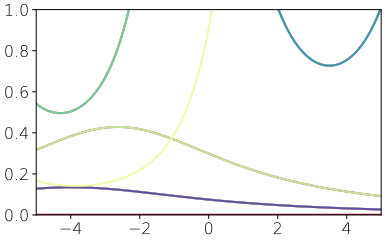

In [80]:
x=np.linspace(-5.0, 5.0, 1000)
y=np.zeros((1000,size))

for i in range(size):
    if target[i][3]==0:
        for j in range(len(x)):
            y[j][i]=target[i][0]/((((x[j]-target[i][2])**2)/(target[i][1]**2))+1)
    else:
        for j in range(len(x)):
            e=(((x[j]-target[i][2])**2)/(2*target[i][1]**2))
            y[j][i]=target[i][0]*np.exp(e)
    plt.plot(x,y)
    
plt.xlim([-5,5])
plt.ylim([0,1])

## Part b
Using the binary cross entropy as your cost function, train your network to distinguish between
them. What level of accuracy can you achieve with 10 functions? 100? 1000?

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(rectangles, labels, test_size=0.1)

model = keras.Sequential(
[
    layers.Dense(256,input_shape=(L*L,),activation='relu'),
    layers.Dense(128,input_shape=(L*L,),activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(256,input_shape=(L*L,),activation='relu'),
    layers.Dense(4,input_shape=(L*L,),activation='relu'),
    layers.Dense(1, activation='sigmoid', bias_initializer='zeros')
])

In [ ]:
model.compile(loss=keras.losses.binary_crossentropy, optimizer='adam', metrics=['accuracy']) 
batch_size = 100
epochs = 30
training_history = {}
training_history['test'] = model.fit(x_train,y_train, epochs=epochs,validation_data=(x_test,y_test), verbose=1)

In [ ]:
# evaluate model
score = model.evaluate(x_test, y_test, verbose=2)

predictions = np.zeros(rectangles.shape[0],dtype=int)
predictions[np.where(model(rectangles)>=0.5)[0]] = 1

mistakes = np.where(labels != predictions)[0]
num_mistakes = len(mistakes)

print(f'Num. Mistakes  = {num_mistakes}')

## Part c
How does the performance of your deep neural network compare to logistic
regression? You can either write your own code to do this, or use some libraries (like
scikit.learn).